# Curso - Modelos preditivos em dados: detecção de fraude

## Importando bibliotecas

In [36]:
import pandas as pd


## Importando dados

In [37]:
df = pd.read_csv('/home/franciscofoz/Documents/GitHub/machine-learning-training/Datasets/fraud_dataset_example.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


## Transformações dos dados

In [38]:
df = df[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()


,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [39]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

df = df.rename(columns = colunas)
df.head()


,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


## Análise exploratória

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [41]:
df.describe()

,fraude,super_fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


## Transformações dos dados para o ML

In [42]:
df = pd.get_dummies(data=df,columns=['tipo'])
df

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,False,False,False,True,False
1,0,0,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,False,False,False,True,False
2,1,0,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,False,False,False,False,True
3,1,0,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,False,True,False,False,False
4,0,0,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,False,False,False,True,False
101609,0,0,10,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,False,True,False,False,False
101610,0,0,10,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,False,False,False,True,False
101611,0,0,10,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,False,False,False,False,True


In [43]:
df.super_fraude.unique()

array([0])

In [44]:
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1)
df

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,0,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,1,1,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,1,1,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,0,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,10,7477.02,785.00,0.00,0.00,0.00,False,False,False,True,False
101609,0,10,282252.35,220339.29,0.00,95156.01,91286.97,False,True,False,False,False
101610,0,10,17289.01,0.00,0.00,0.00,0.00,False,False,False,True,False
101611,0,10,1347146.45,1605.00,0.00,541639.43,2186953.43,False,False,False,False,True


## Modelando Regressão logística

In [45]:
x = df.drop('fraude',axis=1)
y = df['fraude']

In [46]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(max_iter = 1000, random_state=SEED)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print(f'Acuracia = {acuracia}')
print(f'Precisão = {precisao}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Acuracia = 0.9989765391276965
Precisão = 0.2
Recall = 0.043478260869565216
F1 Score = 0.07142857142857142


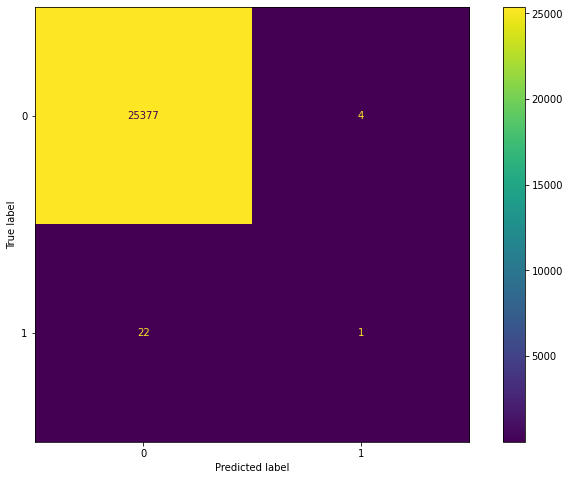

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics  import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

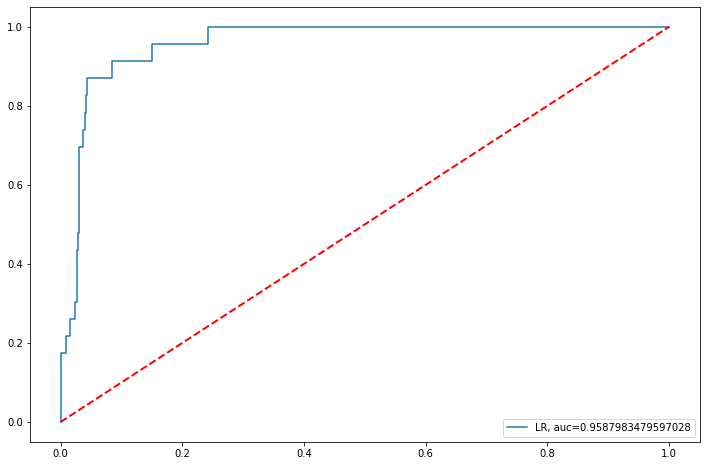

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr,tpr,label='LR, auc='+str(auc))
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.legend(loc=4)

In [31]:
y_pred_proba = lr.predict_proba(x_test)[:,1]
y_pred_proba

array([1.04690577e-01, 1.34614335e-04, 5.23861374e-05, ...,
       1.23890818e-04, 1.63352836e-04, 1.03313703e-04])